
# Churn Prediction

Dataset Details : 
- we can download the dataset from 
   - https://www.superdatascience.com/deep-learning/
   - https://github.com/krishnaik06/ANN-CLassification-Churn/blob/main/Churn_Modelling.csv 

## Load Dataset & Basic EDA

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import pickle


In [6]:
## Load the dataset 
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Datachecks & Data Cleaning

In [8]:
## Check for Missing value 
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
## Check Data Types
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

from this we can understand that we need to encode the `Geography` & `Gender` columns

In [10]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
## Check for duplicate rows 
data.duplicated().sum()

0

In [13]:
## Check the Target Value Distribution 
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
data['Exited'].value_counts(normalize=True) * 100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

From this we have 80 vs 20 percentage for the output data , it is not a good mix but still check the scoring metrics and take decision for applying the class imbalancing techniques

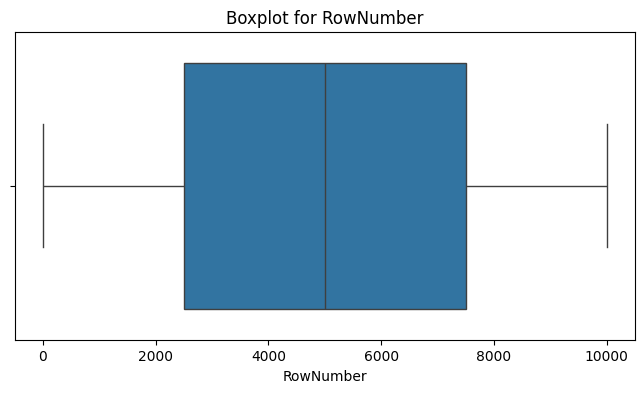

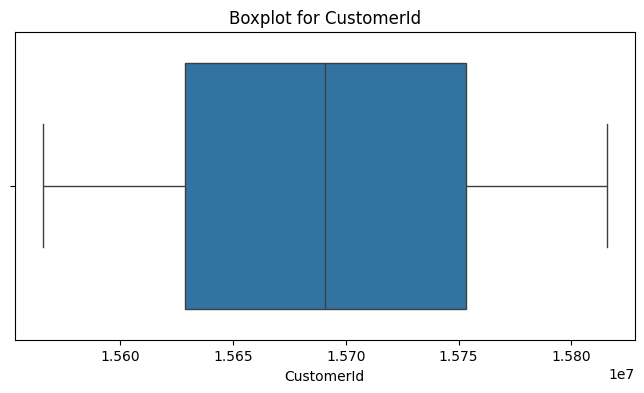

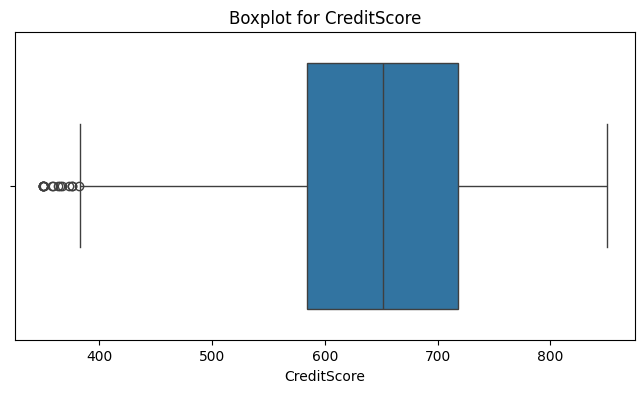

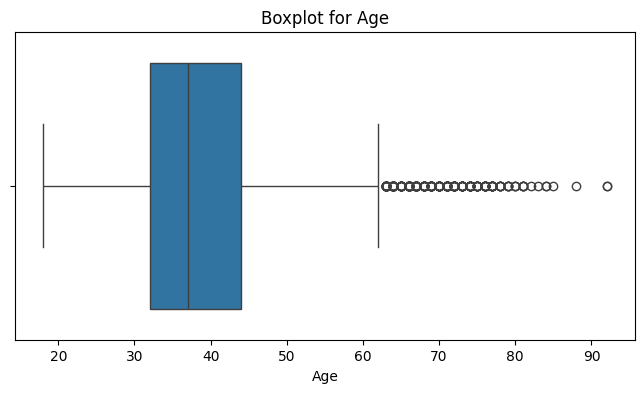

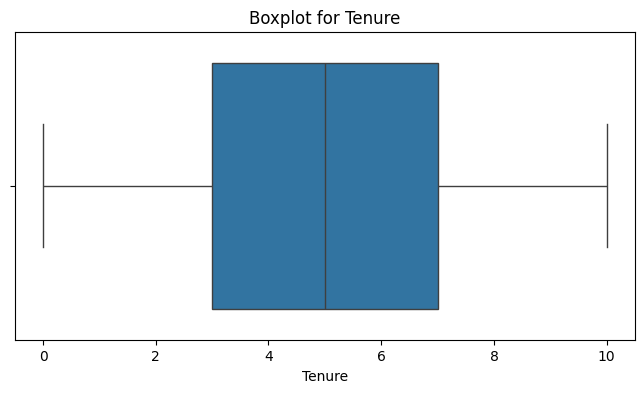

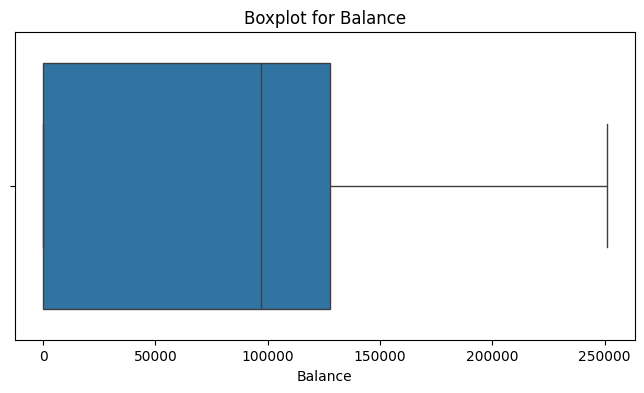

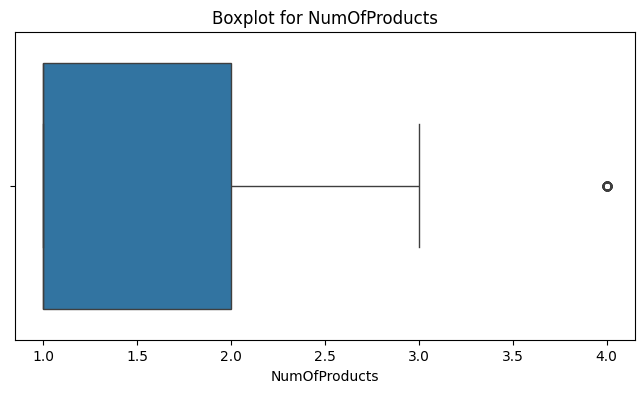

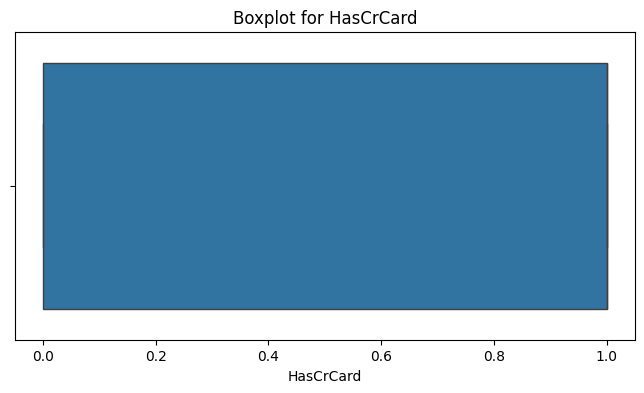

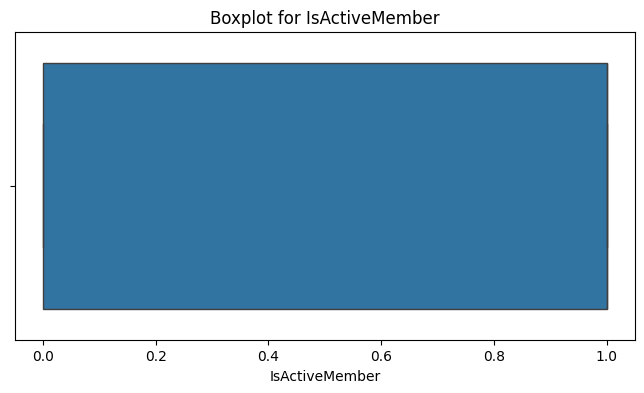

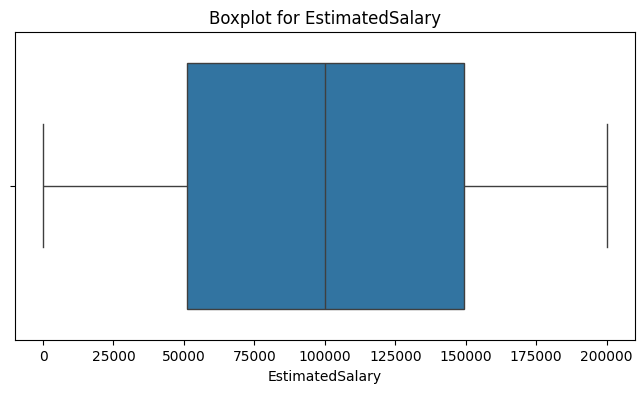

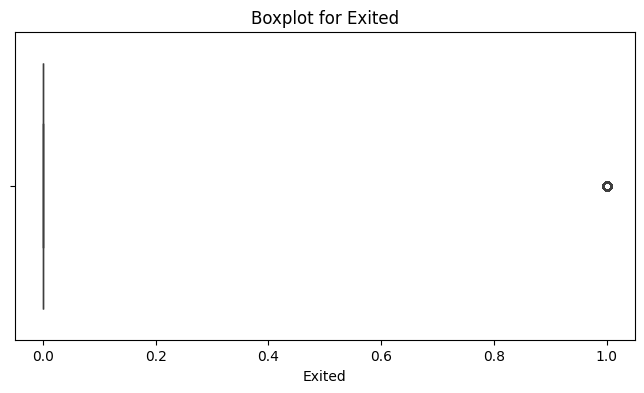

In [15]:
## Check for the Outliers
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



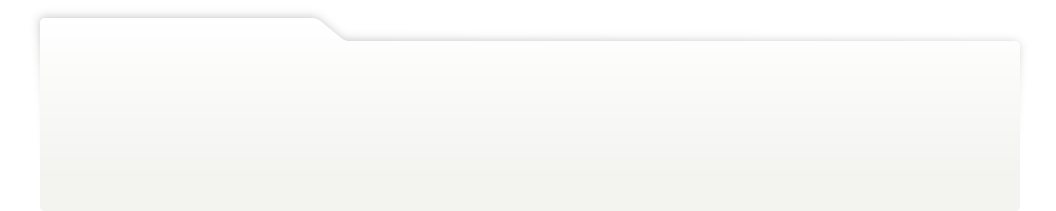
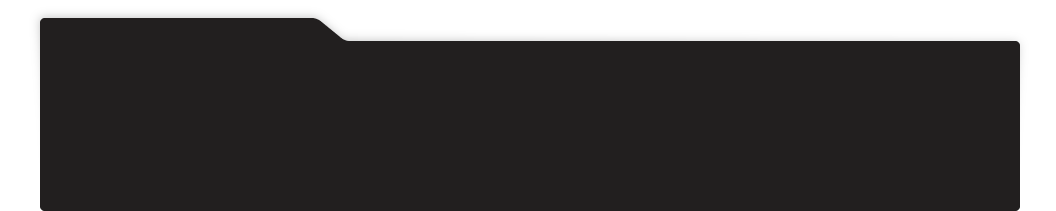
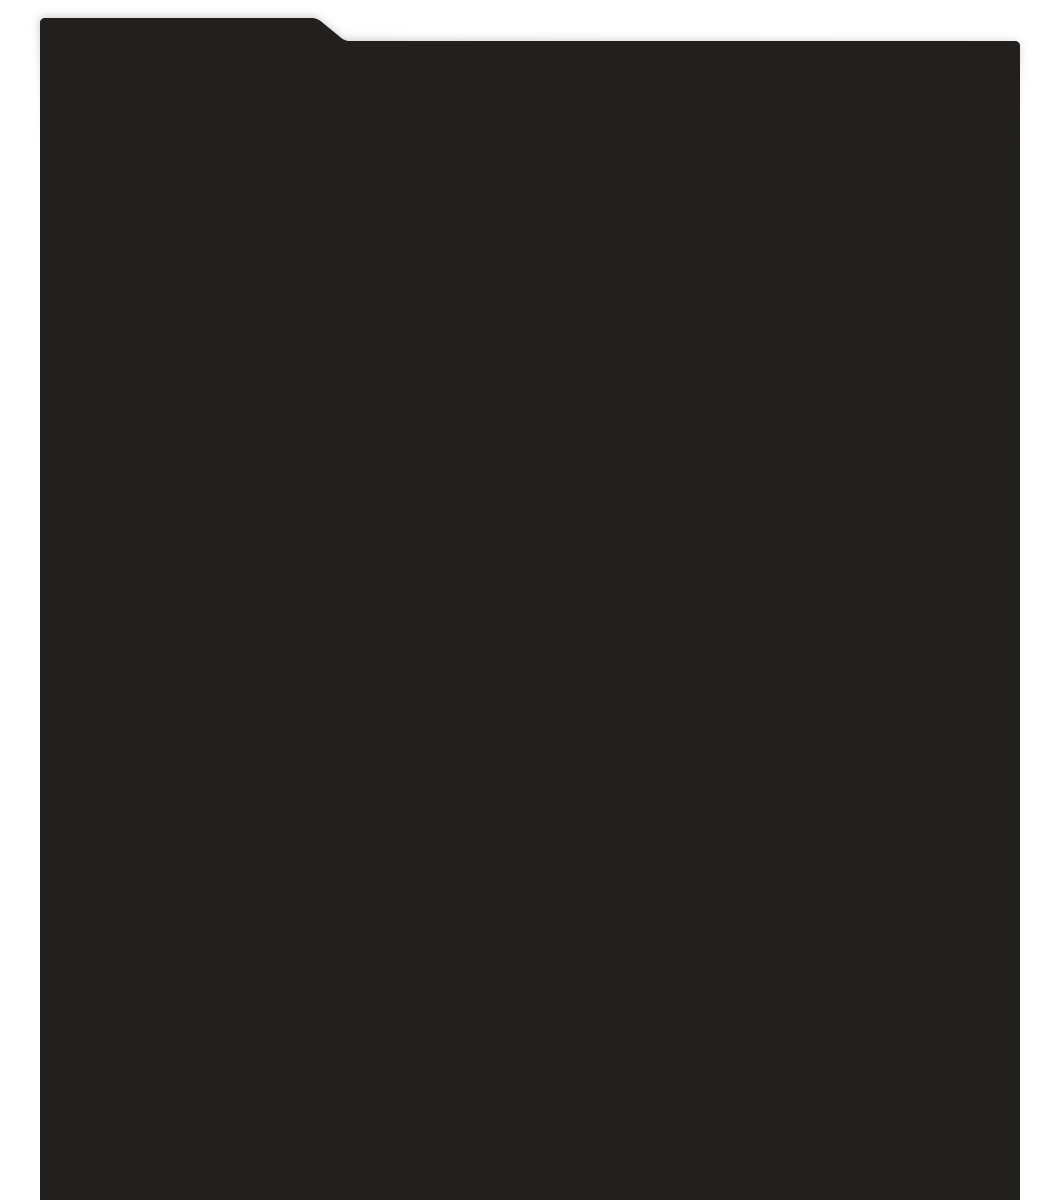
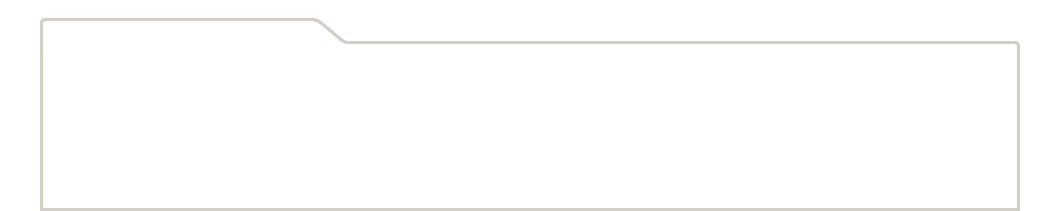
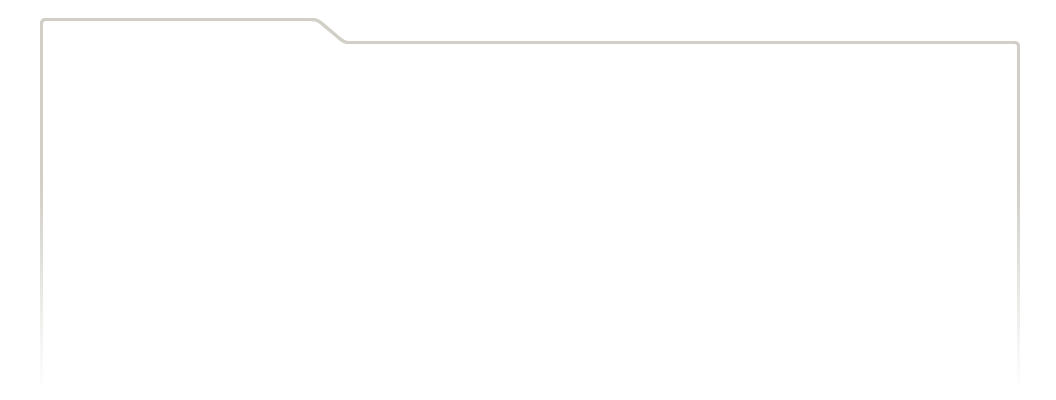
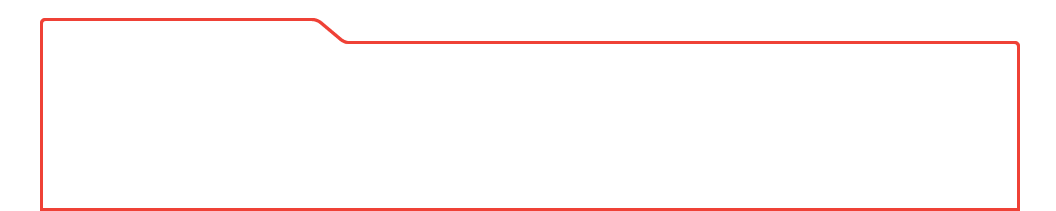
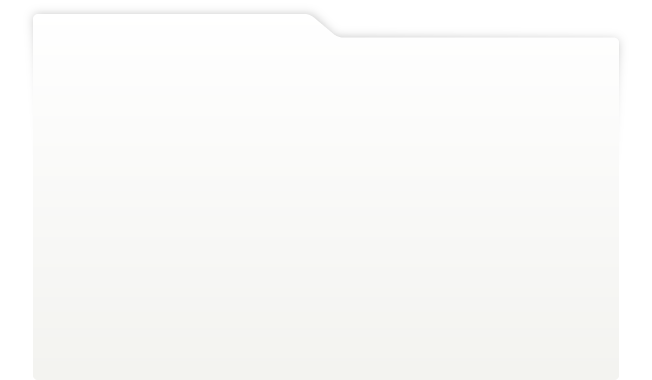
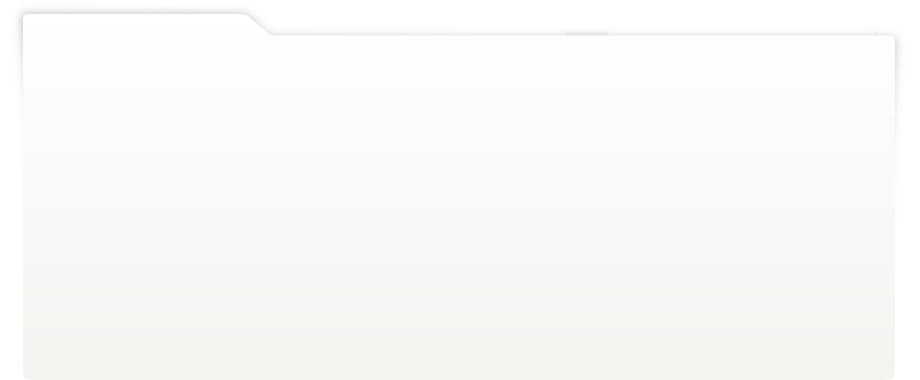
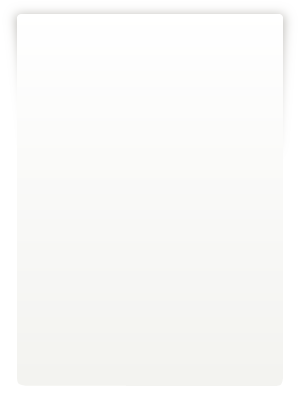
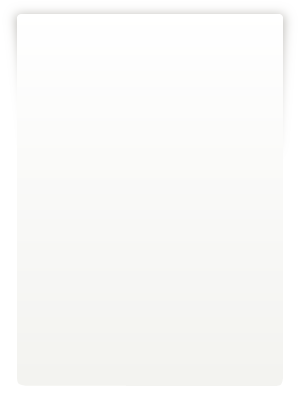
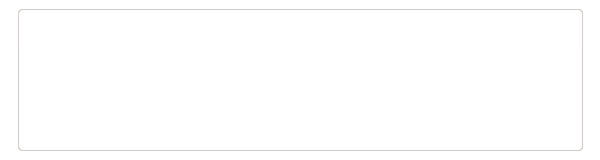
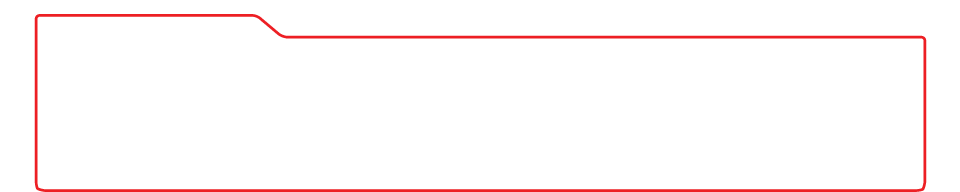
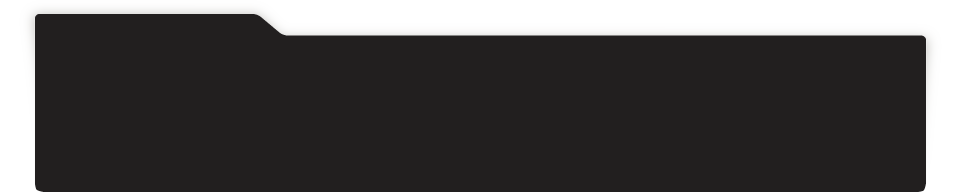
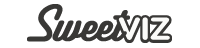
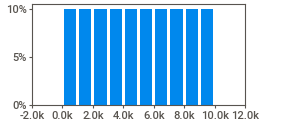
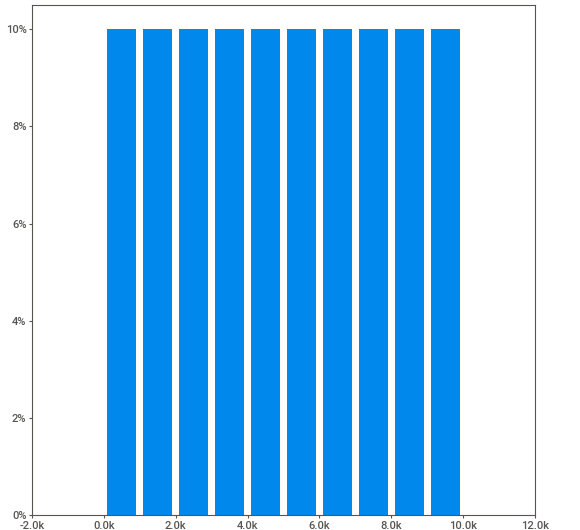
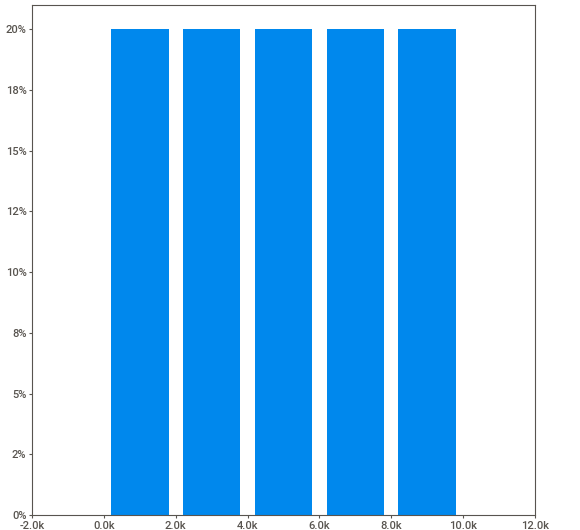
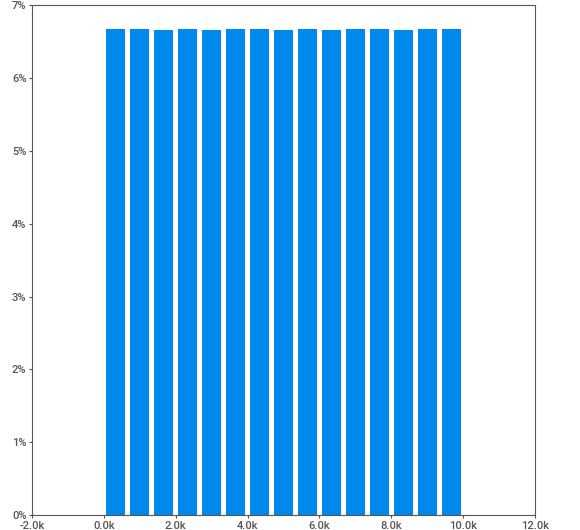
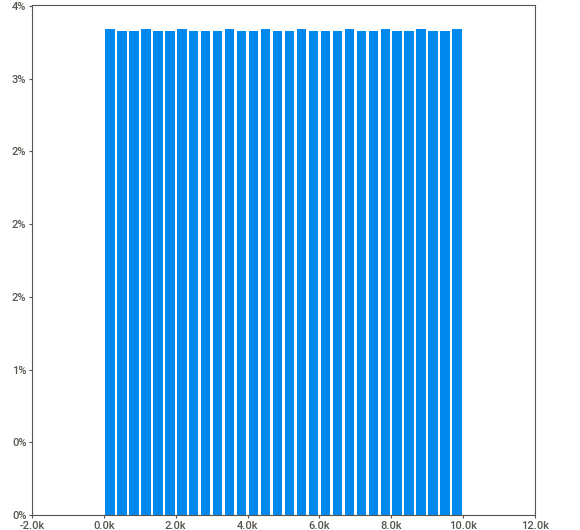
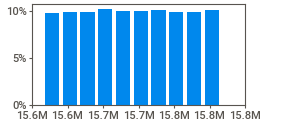
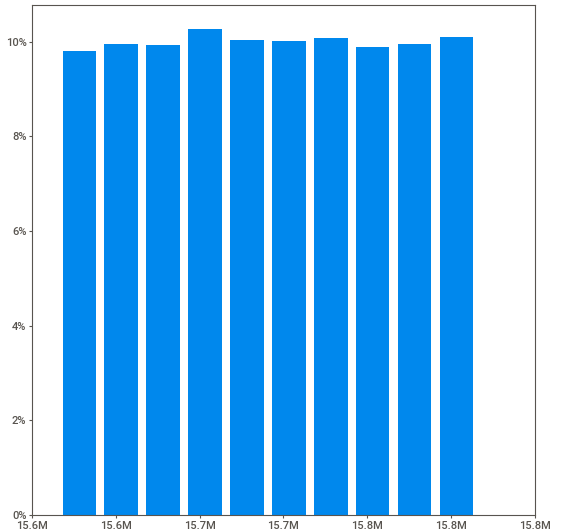
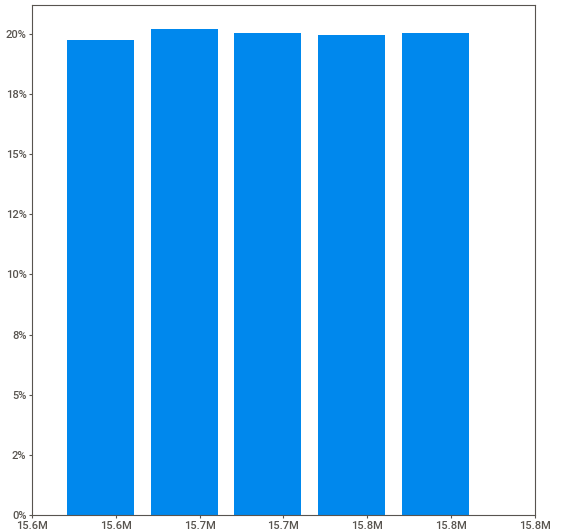
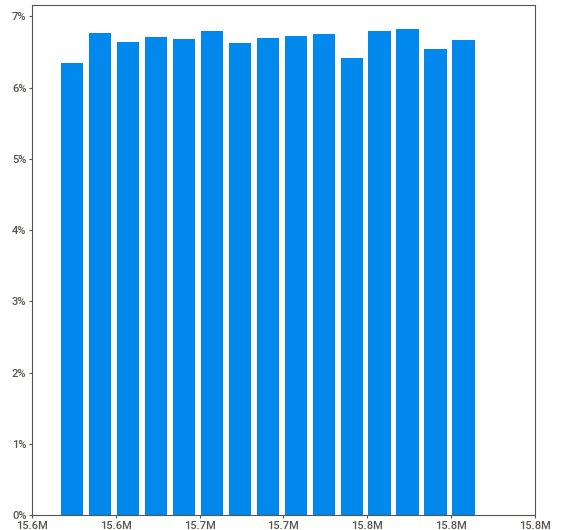
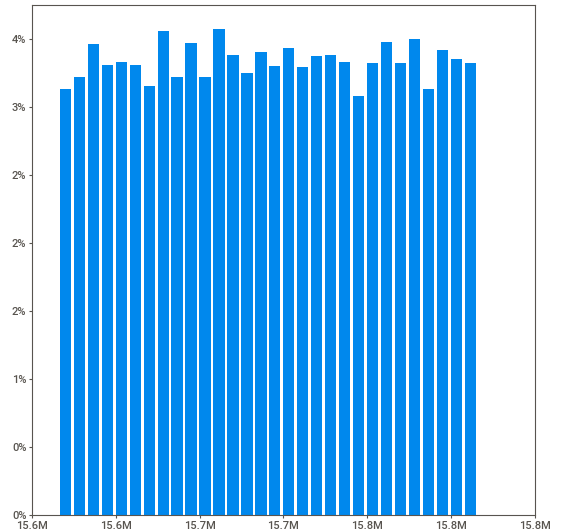
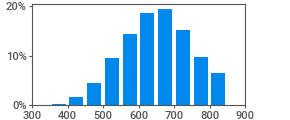
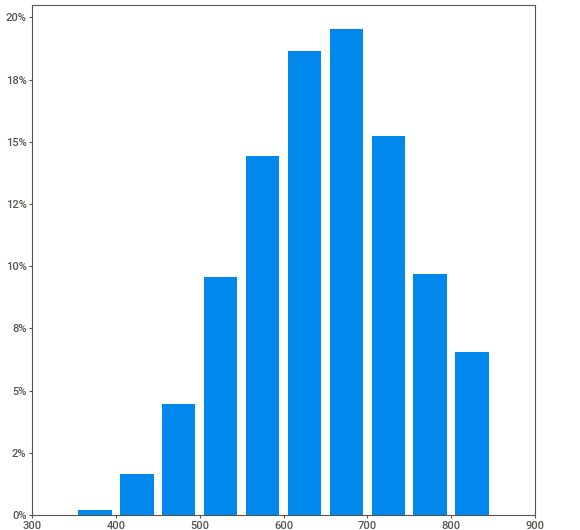
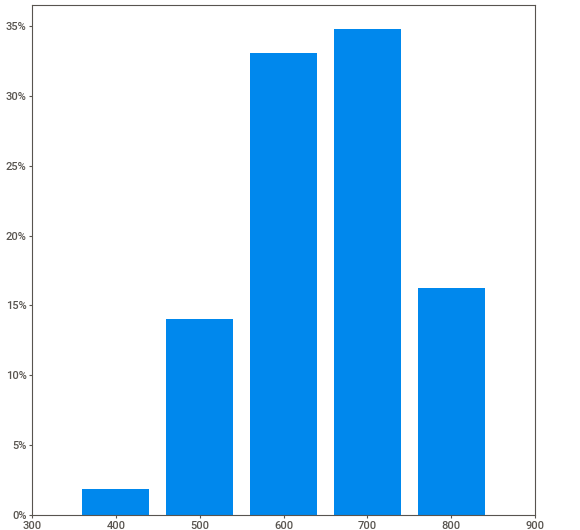
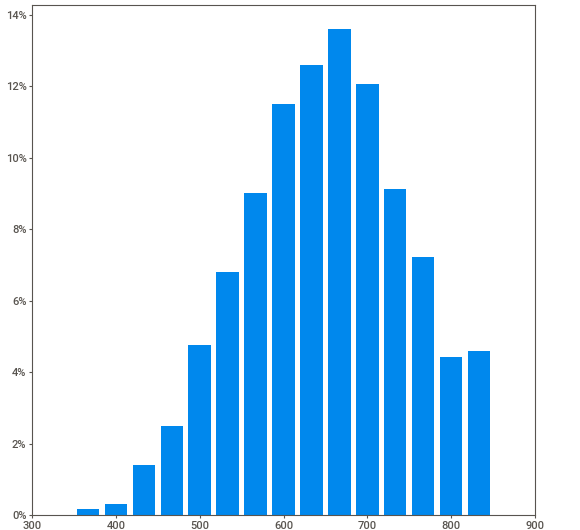
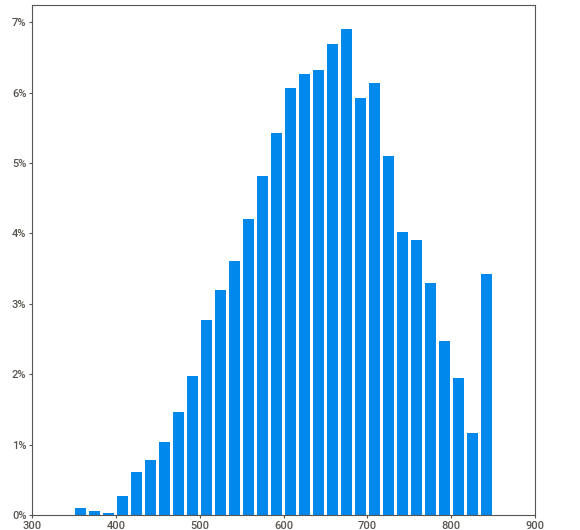
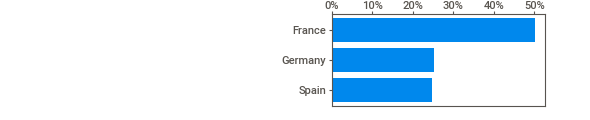
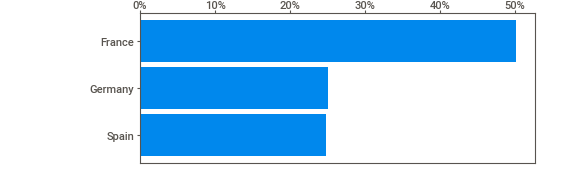
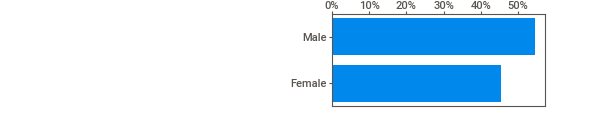
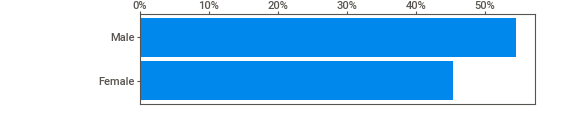
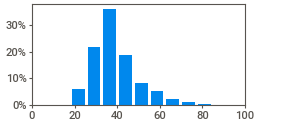
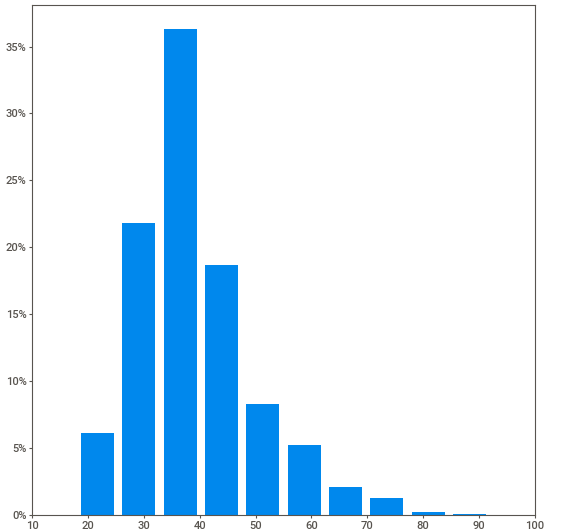
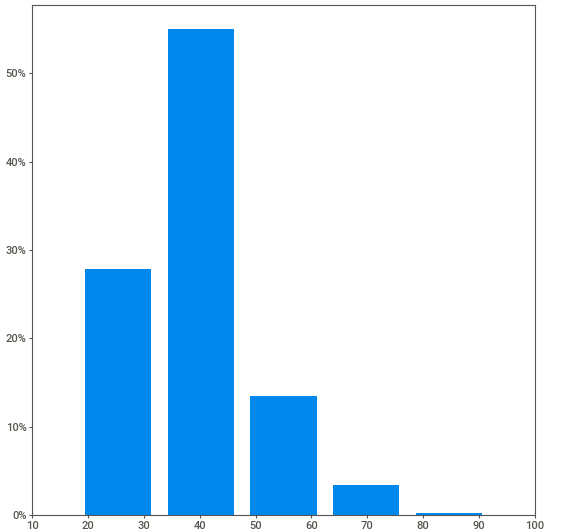
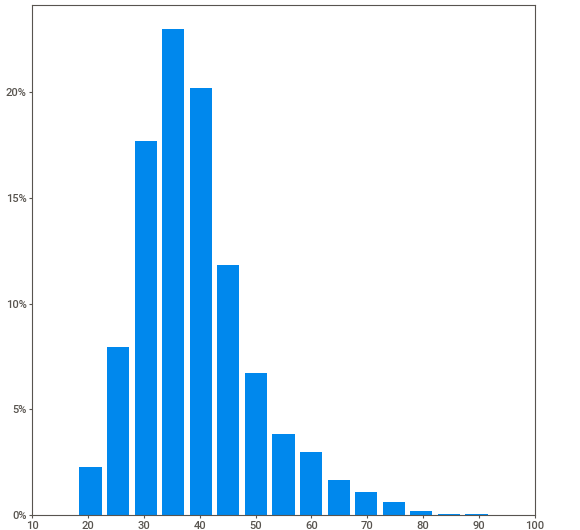
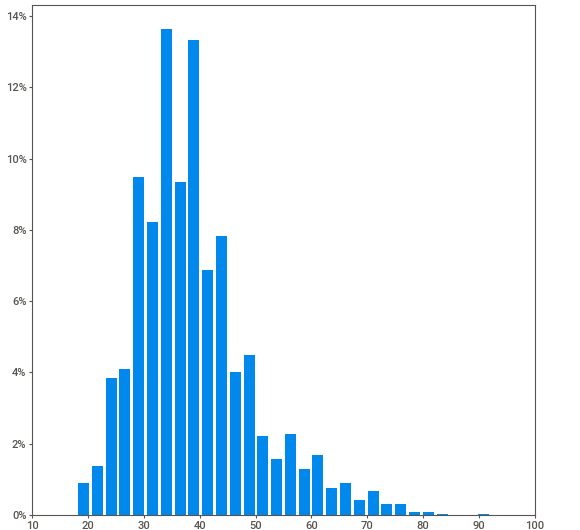
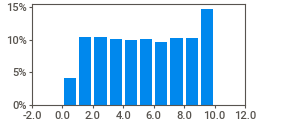
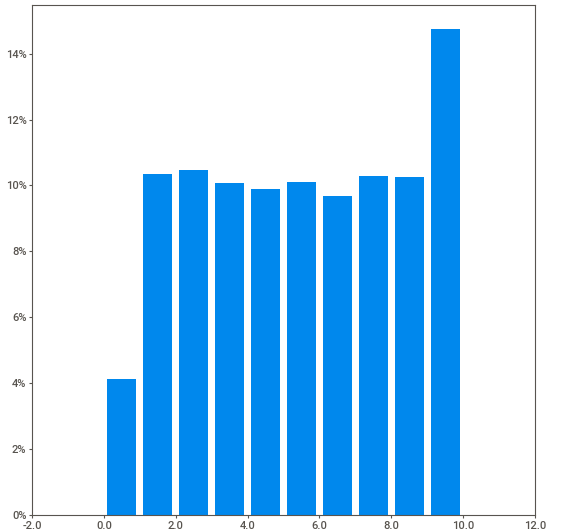
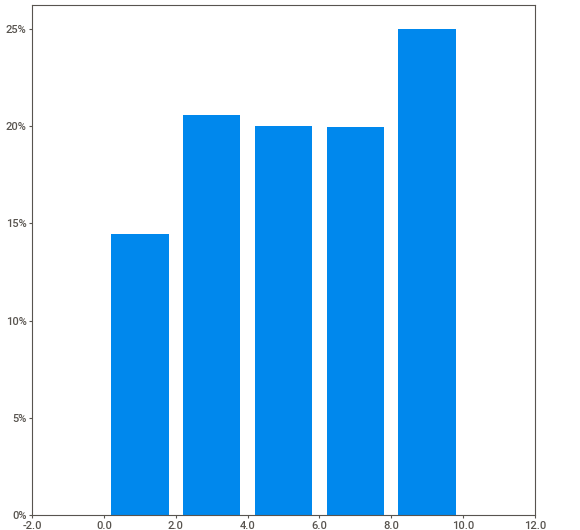
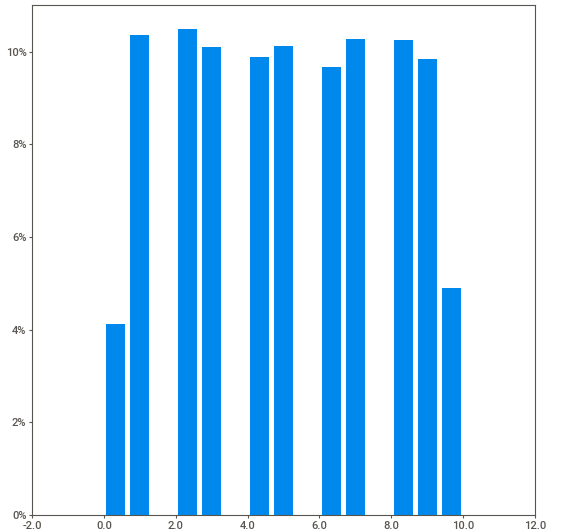
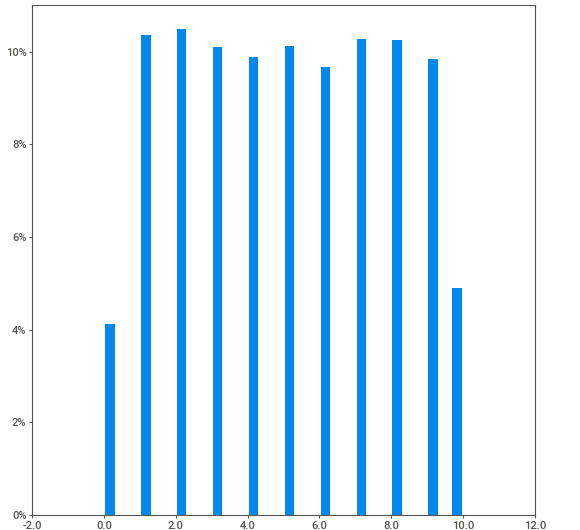
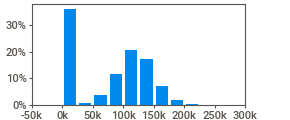
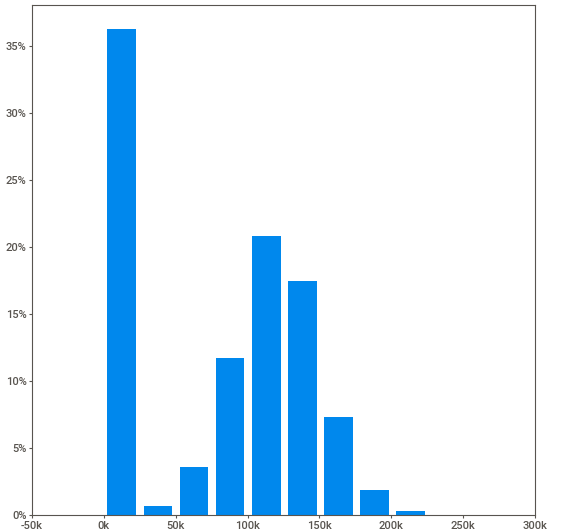
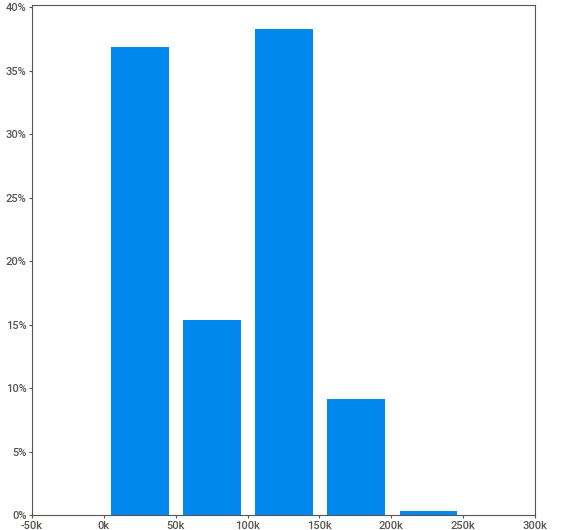
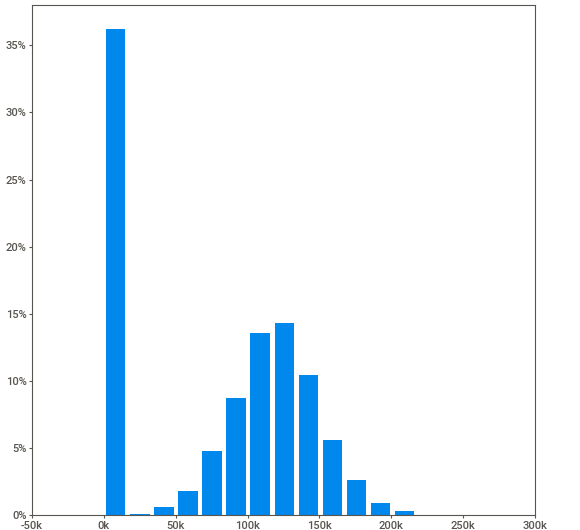
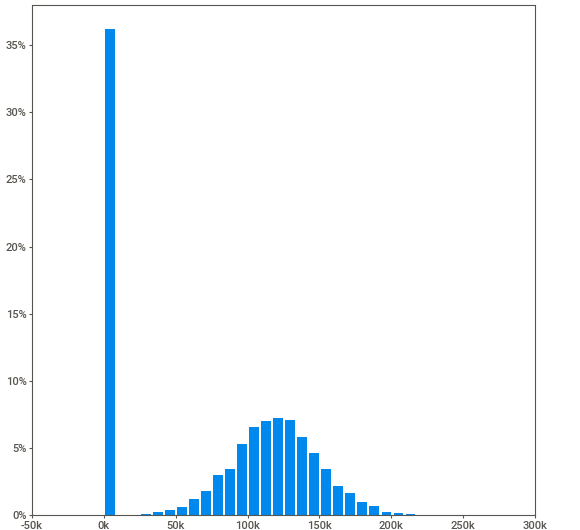
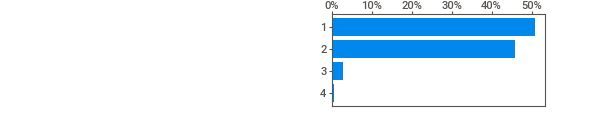
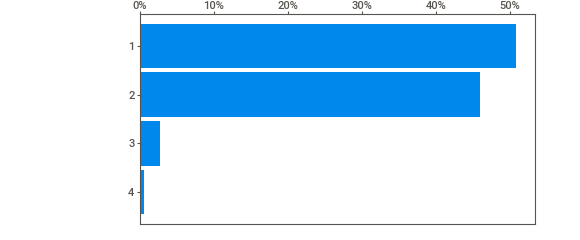
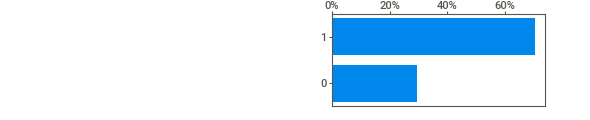
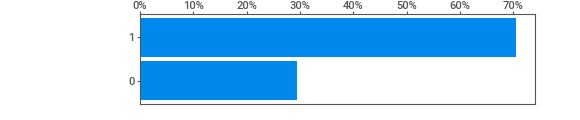
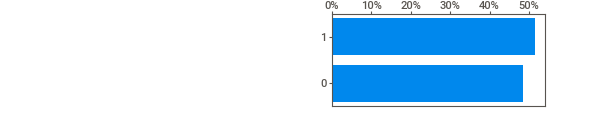
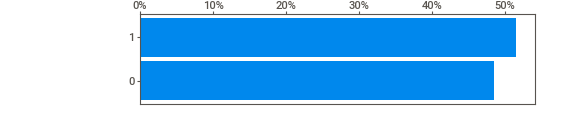
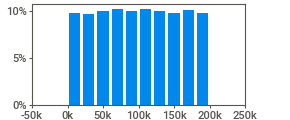
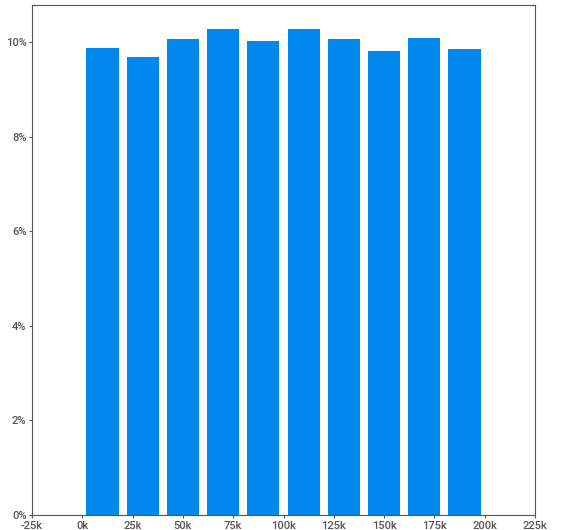
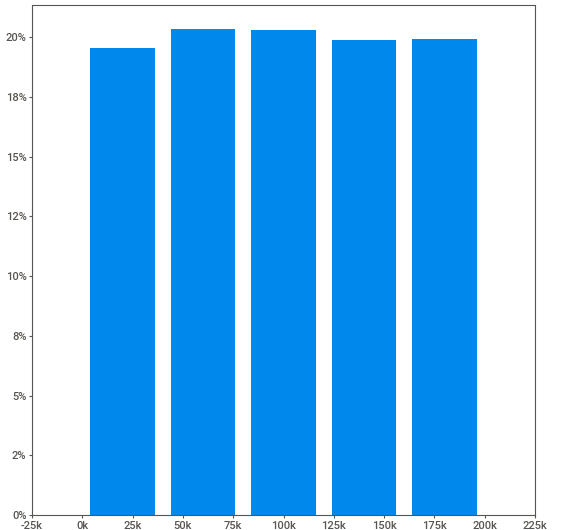
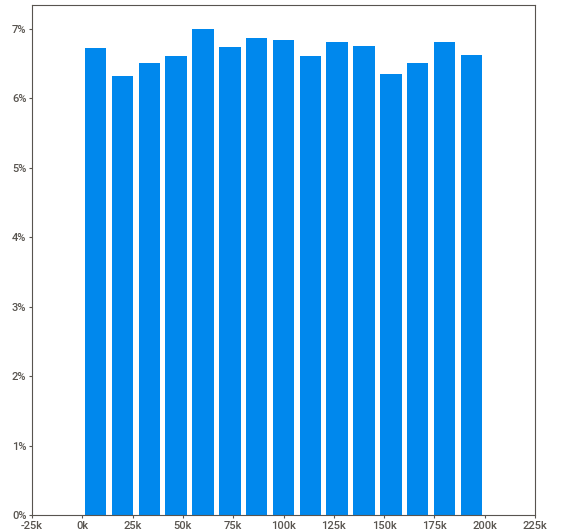
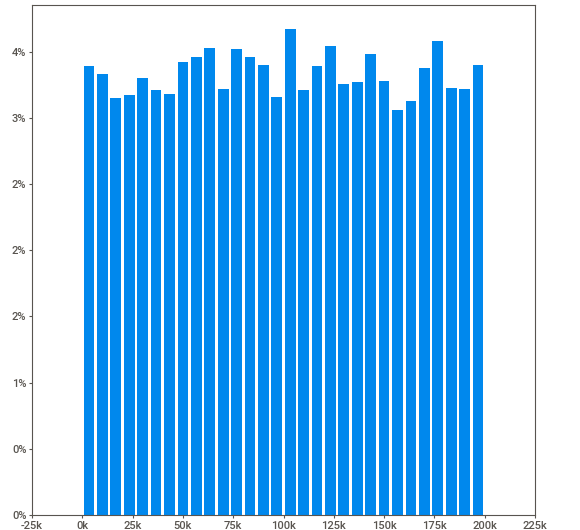
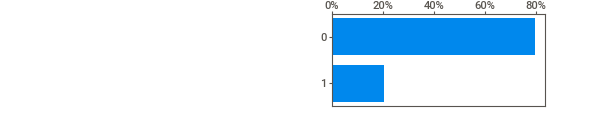
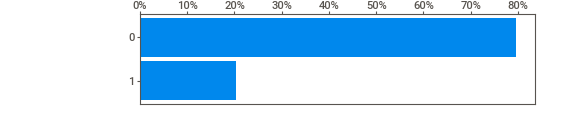
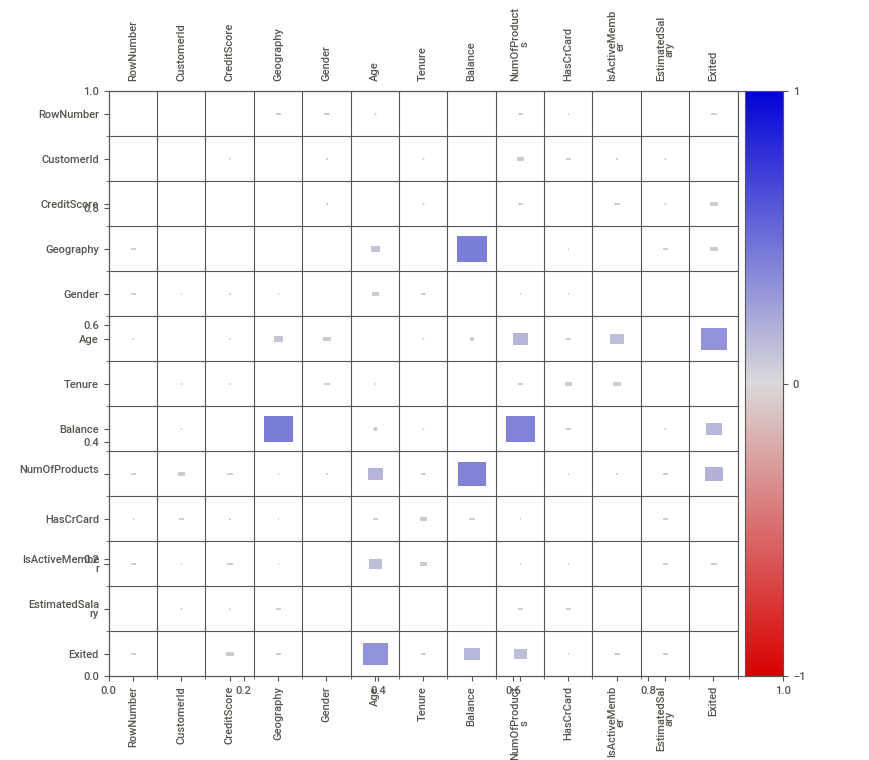
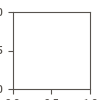

In [16]:
# Lets do Auto EDA 
import sweetviz as sv
from IPython.display import display, HTML

report = sv.analyze(data)
report.show_html('report.html')
display(HTML('report.html'))

In [17]:
## Preprocess the data
### Drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


From this report we can understand that the data is clean
Majorly we need to focus on the encoding for 
- Gender 
- Geography 

We can apply LabelEncoding for the Gender 
& OneHotEncoding for the GeoGraphy 


Also we need to concentrate on the Target feature ie.,m 80 vs 20 

### Encoding for the Categorical Variables 

In [18]:
## Label Encoding for Gender variable
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [19]:
## OneHotEncoder for the Geography Variable 
one_hot_encoder = OneHotEncoder()
geo_encoder=one_hot_encoder.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [20]:
one_hot_encoder.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [21]:
geo_encoder_df = pd.DataFrame(geo_encoder,columns=one_hot_encoder.get_feature_names_out(['Geography']))

In [22]:
geo_encoder_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [23]:
merged_data = pd.concat([data.drop('Geography',axis=1),geo_encoder_df],axis=1)

In [24]:
merged_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  float64
 11  Geography_Germany  10000 non-null  float64
 12  Geography_Spain    10000 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1015.8 KB


In [26]:
## Save the encoders and sscaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(one_hot_encoder,file)

## PreProcess the Data

In [27]:
# Lets Split the data as X,y 

X = merged_data.drop('Exited',axis=1)
y = merged_data['Exited']

X.head(), y.head()

(   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0          619       0   42       2       0.00              1          1   
 1          608       0   41       1   83807.86              1          0   
 2          502       0   42       8  159660.80              3          1   
 3          699       0   39       1       0.00              2          0   
 4          850       0   43       2  125510.82              1          1   
 
    IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
 0               1        101348.88               1.0                0.0   
 1               1        112542.58               0.0                0.0   
 2               0        113931.57               1.0                0.0   
 3               0         93826.63               1.0                0.0   
 4               1         79084.10               0.0                0.0   
 
    Geography_Spain  
 0              0.0  
 1              1.0  
 2          

In [28]:
# Lets apply the class imbalancing techniques and do train test split 
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

smote_tomek = SMOTETomek(sampling_strategy='auto')

X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


# Check the new class distribution
from collections import Counter
print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution: Counter({0: 5443, 1: 5443})


In [29]:
# Now Lets Scale the data 
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

In [30]:
X_resampled

array([[ 0.39383381,  1.18856102, -0.88142762, ...,  1.1479263 ,
        -0.7077913 , -0.57829436],
       [-0.98430989,  1.18856102, -1.67879509, ..., -0.96253723,
        -0.7077913 ,  1.92487551],
       [-0.96260684, -0.84135352, -1.37978229, ...,  1.1479263 ,
        -0.7077913 , -0.57829436],
       ...,
       [-2.56863256, -0.84135352,  1.21166198, ..., -0.96253723,
         1.55427008, -0.57829436],
       [ 0.65427041, -0.84135352, -0.58241482, ..., -0.96253723,
         1.55427008, -0.57829436],
       [-1.99350173, -0.84135352,  0.61363638, ..., -0.96253723,
         1.55427008, -0.57829436]])

In [31]:
# Dump the scaler to the pickle file

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

## ANN Implementation

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [33]:
(X_resampled[1],)

(array([-0.98430989,  1.18856102, -1.67879509, -0.66791141,  0.52874158,
        -0.73821506,  0.77896705, -0.76427052, -0.27468974, -0.96253723,
        -0.7077913 ,  1.92487551]),)

In [34]:
model = Sequential([
    Dense(64, activation='relu',input_shape=((X_resampled.shape[1],))),
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
opt

In [37]:
# Compile the Model
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

In [38]:
# Setup Tensorboard
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_dir = 'logs/fit/'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [39]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [40]:
## Train the model 
historty = model.fit(
    X_resampled,y_resampled,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
341/341 [==============================] - 1s 1ms/step - loss: 0.4164 - accuracy: 0.8128 - precision: 0.8210 - recall: 0.7999 - auc: 0.8916 - val_loss: 0.4066 - val_accuracy: 0.8140 - val_precision: 0.5217 - val_recall: 0.6412 - val_auc: 0.8425
Epoch 2/100
341/341 [==============================] - 0s 655us/step - loss: 0.3782 - accuracy: 0.8323 - precision: 0.8415 - recall: 0.8187 - auc: 0.9116 - val_loss: 0.4804 - val_accuracy: 0.7970 - val_precision: 0.4884 - val_recall: 0.6972 - val_auc: 0.8372
Epoch 3/100
341/341 [==============================] - 0s 702us/step - loss: 0.3660 - accuracy: 0.8365 - precision: 0.8455 - recall: 0.8234 - auc: 0.9167 - val_loss: 0.4484 - val_accuracy: 0.8035 - val_precision: 0.5000 - val_recall: 0.6819 - val_auc: 0.8375
Epoch 4/100
341/341 [==============================] - 0s 718us/step - loss: 0.3591 - accuracy: 0.8410 - precision: 0.8487 - recall: 0.8299 - auc: 0.9202 - val_loss: 0.3822 - val_accuracy: 0.8340 - val_precision: 0.5738 - val

In [41]:
# Save Model 
model.save('model.h5')

/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
## Load Tensorboard Extension
%load_ext tensorboard

In [43]:
%tensorboard --logdir logs/fit/

In [44]:
#

## Predictions

In [73]:
# Example input data
input_data = {
    'CreditScore': 600,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 50000
}

In [74]:
# One-hot encode 'Geography'
geo_encoded = one_hot_encoder.transform([[input_data['Geography']]]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=one_hot_encoder.get_feature_names_out(['Geography']))
geo_encoded_df

/Users/chandu/Desktop/ML_Learnings/datascience/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0


In [75]:
input_df=pd.DataFrame([input_data])
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,Male,40,3,60000,2,1,1,50000


In [76]:
## Encode categorical variables
input_df['Gender']=label_encoder_gender.fit_transform(input_df['Gender'])
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,0,40,3,60000,2,1,1,50000


In [77]:
## concatination one hot encoded 
input_df=pd.concat([input_df.drop("Geography",axis=1),geo_encoded_df],axis=1)
input_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,600,0,40,3,60000,2,1,1,50000,1.0,0.0,0.0


In [78]:
# Scale the data
input_scaled=scaler.transform(input_df)
input_scaled


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [79]:
## PRedict churn
prediction=model.predict(input_scaled)
prediction

1/1 [==============================] - 0s 103ms/step


array([[0.8363077]], dtype=float32)

In [81]:
prediction_proba = prediction[0][0]
prediction_proba

0.8363077

In [82]:
if prediction_proba > 0.5:
    print('The customer is likely to churn.')
else:
    print('The customer is not likely to churn.')

The customer is likely to churn.
